# 오차 역전파(Back Propagation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train data (XOR Problem)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

- Intialization

In [3]:
np.random.seed(2022)

# input - hidden layer
w1 = np.random.randn(2,2)
b1 = np.random.randn(1,2)

# hidden - output layer
w2 = np.random.randn(1,2)
b2 = np.random.randn(1)

# epoch
ep = 30001

# learning rate
lr = 1
mse = []

In [4]:
w1

array([[-5.27899086e-04, -2.74901425e-01],
       [-1.39285562e-01,  1.98468616e+00]])

- 신경망 학습

In [5]:
# Neural Networks 2-2-1
for i in range(ep):
    E, result  = np.array([]), np.array([])
    
    for j in range(len(x)):
        Ha = np.array([])
        
        # Feedforward
        # input - hidden layer
        for k in range(len(w1)):
            Ha = np.append(Ha, 1 / (1 + np.exp(-(np.sum(x[j] * w1[k]) + b1[0][k])))) 

        # hidden - output layer
        Hb = 1 / (1 + np.exp(-(np.sum(Ha * w2) + b2)))
        result = np.append(result, Hb)
        
        # error
        E = np.append(E, y[j] - Hb)
        
        # Back-propagation
        # output - hidden layer
        alpha_2 = E[j] * Hb * (1 - Hb)
        
        # hidden - input layer
        alpha_1 = alpha_2 * Ha * (1 - Ha) * w2
        
        # update
        w2 = w2 + lr * alpha_2 * Ha
        b2 = b2 + lr * alpha_2
        
        w1 = w1 + np.ones((2,2)) * lr * alpha_1 * x[j]
        b1 = b1 + lr * alpha_1

    if i % 1000 == 0:    
        print('Epoch: %05d MSE: %04f Results: 0 0 => %04f 0 1 => %04f 1 0 => %04f 1 1 => %04f'
              %(i, np.mean(E**2), result[0], result[1], result[2], result[3]))   
    mse.append(np.mean(E**2))

Epoch: 00000 MSE: 0.313580 Results: 0 0 => 0.713676 0 1 => 0.679236 1 0 => 0.683284 1 1 => 0.736062
Epoch: 01000 MSE: 0.031011 Results: 0 0 => 0.234844 0 1 => 0.806471 1 0 => 0.840670 1 1 => 0.077806
Epoch: 02000 MSE: 0.004609 Results: 0 0 => 0.092626 0 1 => 0.927843 1 0 => 0.934087 1 1 => 0.017508
Epoch: 03000 MSE: 0.002607 Results: 0 0 => 0.069890 0 1 => 0.946316 1 0 => 0.949595 1 1 => 0.010963
Epoch: 04000 MSE: 0.001921 Results: 0 0 => 0.060074 0 1 => 0.954356 1 0 => 0.956193 1 1 => 0.008423
Epoch: 05000 MSE: 0.001603 Results: 0 0 => 0.054917 0 1 => 0.958721 1 0 => 0.959503 1 1 => 0.007140
Epoch: 06000 MSE: 0.001456 Results: 0 0 => 0.052352 0 1 => 0.961122 1 0 => 0.960909 1 1 => 0.006483
Epoch: 07000 MSE: 0.001431 Results: 0 0 => 0.051902 0 1 => 0.962036 1 0 => 0.960649 1 1 => 0.006292
Epoch: 08000 MSE: 0.001566 Results: 0 0 => 0.054277 0 1 => 0.961157 1 0 => 0.957985 1 1 => 0.006723
Epoch: 09000 MSE: 0.002197 Results: 0 0 => 0.064168 0 1 => 0.955921 1 0 => 0.948560 1 1 => 0.009115


In [6]:
w1

array([[-1.47748121,  2.67435443],
       [-1.61623888,  4.93394201]])

In [7]:
w2

array([[ 25.30272442, -24.27984461]])

In [8]:
b1

array([[-2.14683785,  1.13978721]])

In [9]:
b2

array([12.27344625])

- 검증

In [10]:
for j in range(len(x)):
    Ha = np.array([])
    
    # feedforward
    # input - hidden layer
    for k in range(len(w1)):
        Ha = np.append(Ha, 1 / (1 + np.exp(-(np.sum(x[j] * w1[k]) + b1[0][k]))))
    
    # hidden - output layer
    Hb = 1 / (1 + np.exp(-(np.sum(Ha * w2) + b2)))
    print(x[j], Hb[0])

[0 0] 0.03004367842287361
[0 1] 0.9813366965871635
[1 0] 0.9741511255435121
[1 1] 0.009271827311362684


- MSE 그래프

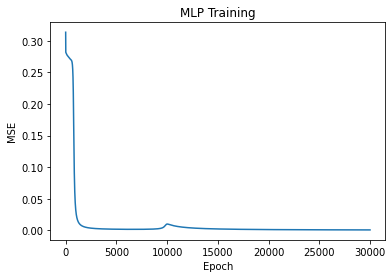

In [11]:
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MLP Training')
plt.plot(mse)
plt.show()